In [4]:
import netCDF4 as nc
from os import listdir, system
from os.path import isfile, join, isdir
import re

# Get List of Data Files

In [5]:
# this directory can be accessed from cori
maindir="/project/projectdirs/dasrepo/gordon_bell/climate/data/big_images/1979"
lsdir=listdir(maindir)

rpfile = re.compile(r"^cam5_.*\.nc$")
camfiles = [f for f in lsdir if rpfile.match(f)]

# Take a random file and open it

In [33]:
random_file = camfiles[0]

root = nc.Dataset(maindir+'/'+random_file, "r", format="NETCDF4")

# Look at the Keys

In [34]:
root.variables.keys()

[u'time',
 u'time_bnds',
 u'lat',
 u'bounds_lat',
 u'lon',
 u'bounds_lon',
 u'PRECT',
 u'PS',
 u'PSL',
 u'QREFHT',
 u'T200',
 u'T500',
 u'TMQ',
 u'TREFHT',
 u'TS',
 u'U850',
 u'UBOT',
 u'V850',
 u'VBOT',
 u'Z1000',
 u'Z200',
 u'ZBOT',
 u'teca_mask',
 u'teca_time',
 u'teca_xmin',
 u'teca_xmax',
 u'teca_ymin',
 u'teca_ymax']

# We pick the  integrated water vapor variable

In [36]:
tmq = root['TMQ']
print tmq

<type 'netCDF4._netCDF4.Variable'>
float32 TMQ(time, lat, lon)
    units: kg/m2
    missing_value: 1e+20
    long_name: Total (vertically integrated) precipitatable water
unlimited dimensions: time
current shape = (8, 768, 1152)
filling off



# Get shape. Note each variable has shape (time, x, y) or (time,lat,long)

In [40]:
tmq.shape 
# note its actually 768 by 1152 not 1024 x 1024

(8, 768, 1152)

In [41]:
# get all values in the first time step 
tmq_one_time_step = tmq[0]

In [42]:
from matplotlib import pyplot as plt

In [43]:
%matplotlib inline

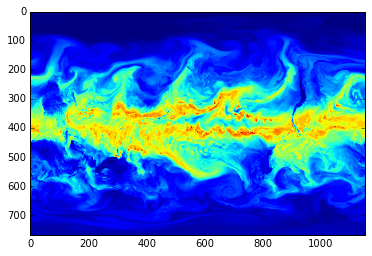

In [44]:
plt.imshow(tmq_one_time_step)

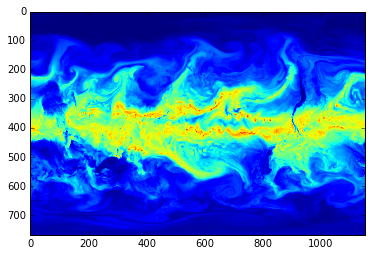

In [45]:
#second time step
plt.imshow(root['TMQ'][1])

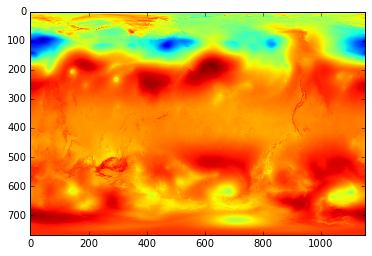

In [46]:
plt.imshow(root['PSL'][0])

(768, 1152)